# 5.2 Assignment
# DSC 640: Data Presentation and Visualizations
# Wittlieff, Alexa
# 8/13/2022

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import datasets
# Load the ppg2008 dataset
df = pd.read_csv(r'C:\Users\Alexa\Documents\GitHub\Wittlieff_Alexa_DSC640_GitHubRepository\5.2 Exercises\education.csv')
df2 = pd.read_csv(r'C:\Users\Alexa\Documents\GitHub\Wittlieff_Alexa_DSC640_GitHubRepository\5.2 Exercises\education2.csv')

In [3]:
# Verify import success
df.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
0,United States,501,515,493,46,7.9,4.4
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6


In [4]:
# Remove Row 1 United States Data
df = df.iloc[1: , :]

### 1. Histogram

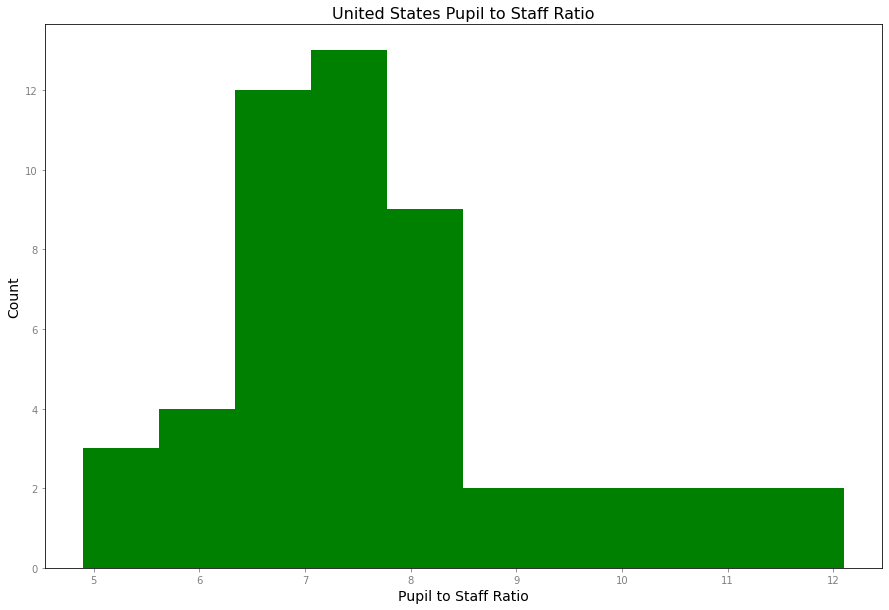

In [6]:
# Build Histogram
plt.rcParams["figure.figsize"] = (15,10)
plt.hist(df['pupil_staff_ratio'], 10, color = 'green')
plt.title('United States Pupil to Staff Ratio', loc='center', fontsize=16, color='k')
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')
plt.xlabel('Pupil to Staff Ratio', fontsize=14, color='k')
plt.ylabel('Count', fontsize=14, color='k')
plt.show()

### 2. Box Plot

Text(0, 0.5, 'Pupil to Staff Ratio')

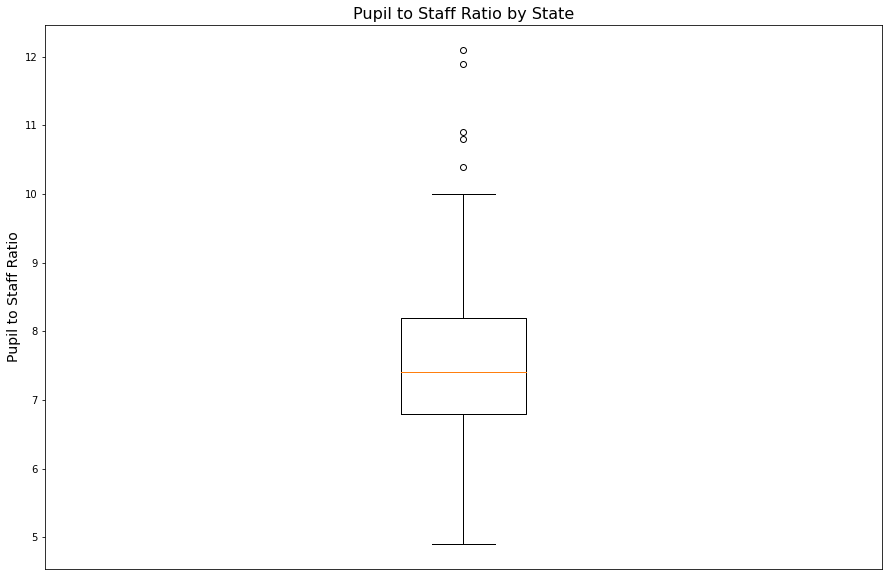

In [7]:
# Create Box Plot
plt.boxplot(df['pupil_staff_ratio'])
plt.title('Pupil to Staff Ratio by State', loc='center', fontsize=16, color='k')
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)
plt.tick_params(axis='y', colors='k')
plt.ylabel('Pupil to Staff Ratio', fontsize=14, color='k')

### 3. Bullet Chart

In [25]:
# Create Bullet Chart
def bullet_chart(df,color_code=False):
  y_pos = np.arange(len(df.index))

  # Set Colors
  df["col"]="k"
  if (color_code==True):
    for i in y_pos:
      if(df["current value"][i]>=df["stretch goal"][i]):
        df["col"][i]="green"
      elif(df["current value"][i]>=df["base goal"][i]):
        df["col"][i]="gold"
      else:
        df["col"][i]="red"

  # Initialize plot
  fig, ax = plt.subplots()
  ax.barh(y_pos, df["stretch goal"], height=0.5, align='center', color='green', label="stretch goal")
  ax.barh(y_pos, df["base goal"], height=0.5, align='center', color='yellow', label = "base goal")
  ax.barh(y_pos, df["current value"], height=0.2, align='center',color=df["col"])
  ax.set_yticklabels(df["labels"])
  ax.set_yticks(y_pos)
  ax.invert_yaxis()
  ax.set_title('Reading Scores by State')
    
  # Add labels
  for i in y_pos:
    ax.text(df["current value"][i], i+0.05, df["current value"][i])

  # add legend, format borders
  plt.legend(loc=(0.35,1.0))
  ax.spines['left'].set_linewidth(0.2)
  ax.spines['bottom'].set_linewidth(0)
  ax.spines['right'].set_linewidth(0)
  ax.spines['top'].set_linewidth(0)
  fig.subplots_adjust(left=0.2, top=0.8)

  return fig

In [26]:
# Create df
df_bullet=df

df_bullet['labels'] = df_bullet['state']

df_bullet['base goal'] = 523
df_bullet['stretch goal'] = 571.25
df_bullet['current value'] = df_bullet['reading']

C:\Users\Alexa\AppData\Local\Temp/ipykernel_11548/619177917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col"]="k"
C:\Users\Alexa\AppData\Local\Temp/ipykernel_11548/619177917.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["labels"])


KeyError: 0

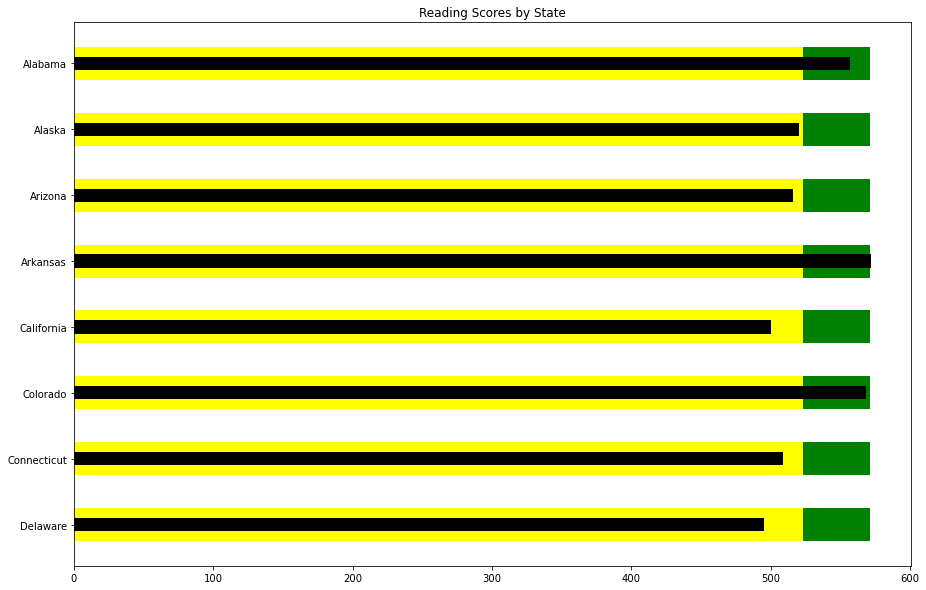

In [28]:
bullet_chart(df_bullet.loc[:8, :])

### 4. Scatter Plot

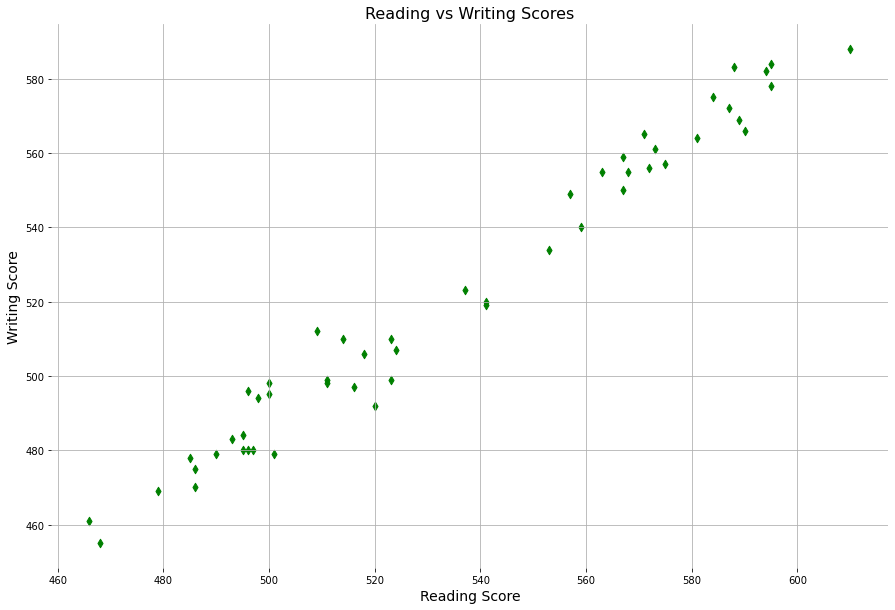

In [35]:
# Create Scatter Plot
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(df['reading'], df['writing'], color='green', marker='d')
plt.box(False)
plt.title('Reading vs Writing Scores', loc='center', fontsize=16, color='k')
plt.tick_params(axis='x', colors='k')
plt.tick_params(axis='y', colors='k')
plt.xlabel('Reading Score', fontsize=14, color='k')
plt.ylabel('Writing Score', fontsize=14, color='k')
plt.grid()